# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold,GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [3]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [4]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

In [5]:
#minimum RMSE
min_rmse = min(rmse_lst)
print("Minimum RMSE: ", min_rmse)

Minimum RMSE:  1.0664624803819673


Text(0, 0.5, 'Loss function')

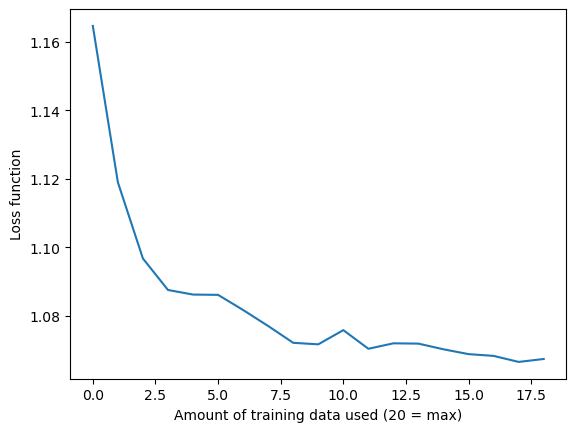

In [6]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [7]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

In [8]:
#Minimum RMSE
min_rmse = min(num_trees_lst)
print("Minimum RMSE: ", min_rmse)

Minimum RMSE:  1.06685991762679


Text(0, 0.5, 'Loss function')

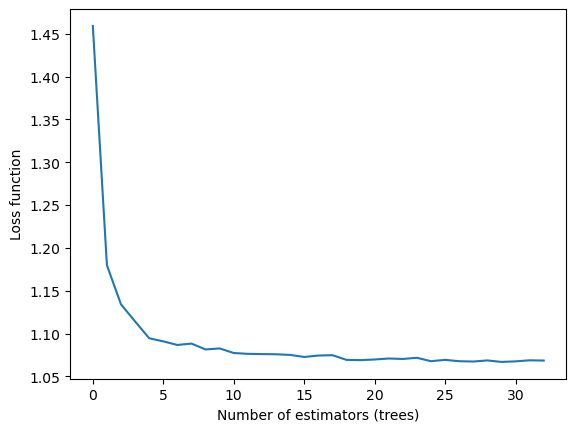

In [9]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

I would cut the first plot. Random Forest Regressors tend to work better with larger amounts of data. The model may not generalize well with less data. That is visible in the chart by the jagged plot.  The second chart shows a smoother decent. Both models converge near the same RMSE. 

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [10]:


def clean_data(df):
    # Drop column: 'session_id'
    df = df.drop(columns=['session_id'])
    # Replace missing values with "NONE" in column: 'encryption_used'
    df = df.fillna({'encryption_used': "NONE"})
    # One-hot encode column: 'protocol_type'
    insert_loc = df.columns.get_loc('protocol_type')
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, ['protocol_type']]), df.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to int16 for column: 'protocol_type_ICMP'
    df = df.astype({'protocol_type_ICMP': 'int8'})
    # Change column type to int8 for column: 'protocol_type_TCP'
    df = df.astype({'protocol_type_TCP': 'int8'})
    # Change column type to int8 for column: 'protocol_type_UDP'
    df = df.astype({'protocol_type_UDP': 'int8'})
    # One-hot encode column: 'encryption_used'
    insert_loc = df.columns.get_loc('encryption_used')
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, ['encryption_used']]), df.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to int8 for column: 'encryption_used_AES'
    df = df.astype({'encryption_used_AES': 'int8'})
    # Change column type to int8 for column: 'encryption_used_DES'
    df = df.astype({'encryption_used_DES': 'int8'})
    # Change column type to int8 for column: 'encryption_used_NONE'
    df = df.astype({'encryption_used_NONE': 'int8'})
    # One-hot encode column: 'browser_type'
    insert_loc = df.columns.get_loc('browser_type')
    df = pd.concat([df.iloc[:,:insert_loc], pd.get_dummies(df.loc[:, ['browser_type']]), df.iloc[:,insert_loc+1:]], axis=1)
    # Change column type to int8 for column: 'browser_type_Chrome'
    df = df.astype({'browser_type_Chrome': 'int8'})
    # Change column type to int8 for column: 'browser_type_Edge'
    df = df.astype({'browser_type_Edge': 'int8'})
    # Change column type to int8 for column: 'browser_type_Firefox'
    df = df.astype({'browser_type_Firefox': 'int8'})
    # Change column type to int8 for column: 'browser_type_Safari'
    df = df.astype({'browser_type_Safari': 'int8'})
    # Change column type to int8 for column: 'browser_type_Unknown'
    df = df.astype({'browser_type_Unknown': 'int8'})
    return df

# Loaded variable 'df' from URI: d:\repos\BU\BU-MSDS\DX699\DX699-2025-spring-B2\cybersecurity_intrusion_data.csv


In [11]:
df_ci = pd.read_csv('cybersecurity_intrusion_data.csv')

In [12]:
df_ci_clean = clean_data(df_ci)
df_ci_clean.head()

,network_packet_size,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,login_attempts,session_duration,encryption_used_AES,encryption_used_DES,encryption_used_NONE,ip_reputation_score,failed_logins,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown,unusual_time_access,attack_detected
0,599,0,1,0,4,492.983263,0,1,0,0.606818,1,0,1,0,0,0,0,1
1,472,0,1,0,3,1557.996461,0,1,0,0.301569,0,0,0,1,0,0,0,0
2,629,0,1,0,3,75.044262,0,1,0,0.739164,2,1,0,0,0,0,0,1
3,804,0,0,1,4,601.248835,0,1,0,0.123267,0,0,0,0,0,1,0,1
4,453,0,1,0,5,532.540888,1,0,0,0.054874,1,0,0,1,0,0,0,0


In [13]:
#create X and y dataframes and split in train and test
X = df_ci_clean.drop(columns = ['attack_detected'])
y = df_ci_clean['attack_detected'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
#Implement random forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)

RMSE:  0.3035227309741881


In [15]:
#Perform cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)  
scores = cross_val_score(rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
rmse_cv = np.mean(np.abs(scores))
print("Cross-validated RMSE: ", rmse_cv)

Cross-validated RMSE:  0.3103147943034966


In [16]:
num_trees_lst_ci = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(X_train, y_train)
    num_trees_lst_ci.append(root_mean_squared_error(rf.predict(X_test), y_test))

In [17]:
#Minimum RMSE
min_rmse_ci = min(num_trees_lst_ci)
print("Minimum RMSE: ", min_rmse_ci)
print("Best number of trees: ", num_trees_lst_ci.index(min_rmse_ci) * 3 + 1)

Minimum RMSE:  0.30262140559172357
Best number of trees:  73


Text(0, 0.5, 'Loss function')

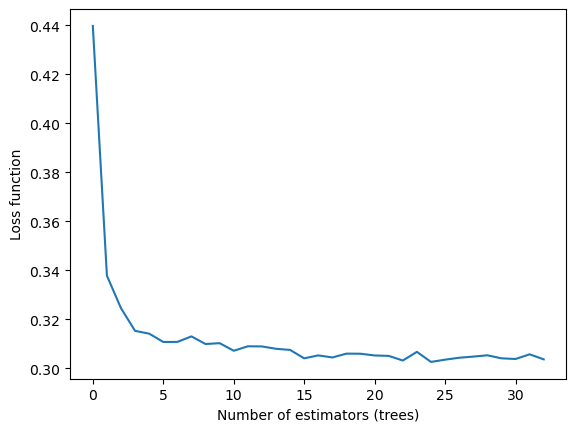

In [18]:
plt.plot(num_trees_lst_ci)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

In [19]:
max_depth_lst_ci = list()
for max_depth_value in  range(1, 15, 3):
    rf = RandomForestRegressor(max_depth= max_depth_value)
    rf.fit(X_train, y_train)
    max_depth_lst_ci.append(root_mean_squared_error(rf.predict(X_test), y_test))

In [20]:
min_rmse_ci_md = min(max_depth_lst_ci)
print("Minimum RMSE: ", min_rmse_ci_md)
print("Best max depth: ", max_depth_lst_ci.index(min_rmse_ci_md) + 10)

Minimum RMSE:  0.2988594962852659
Best max depth:  12


Text(0, 0.5, 'Loss function')

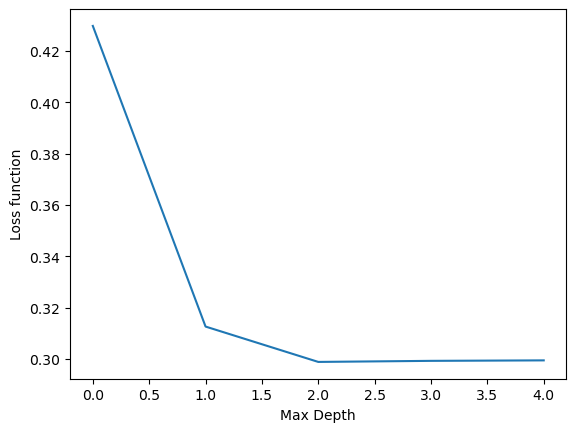

In [21]:
plt.plot(max_depth_lst_ci)
plt.xlabel("Max Depth")
plt.ylabel("Loss function")

In [22]:
max_features_lst_ci = list()
for max_features_value in  range(2, 18, 2):
    rf = RandomForestRegressor(max_depth= max_features_value)
    rf.fit(X_train, y_train)
    max_features_lst_ci.append(root_mean_squared_error(rf.predict(X_test), y_test))

In [23]:
min_rmse_ci_mf = min(max_features_lst_ci)
print("Minimum RMSE: ", min_rmse_ci_mf)
print("Best max features: ", max_features_lst_ci.index(min_rmse_ci_mf) + 2)

Minimum RMSE:  0.2988016214931053
Best max features:  4


Text(0, 0.5, 'Loss function')

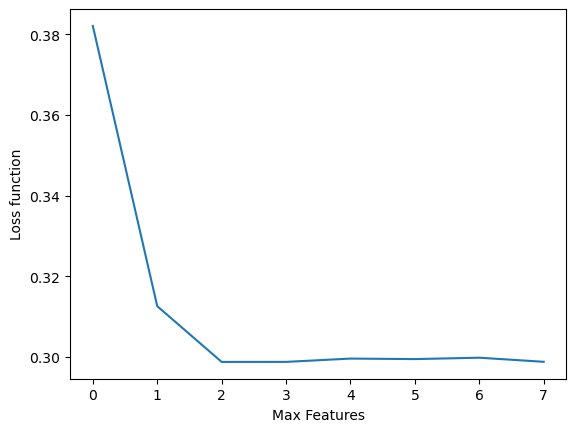

In [24]:
plt.plot(max_features_lst_ci)
plt.xlabel("Max Features")
plt.ylabel("Loss function")

In [25]:
param_grid_rf = {'n_estimators': range(60, 80, 2),
            'max_depth': range(10, 16, 1),
            'max_features': range(2, 14, 2),
            'bootstrap': [False]
}

In [26]:
rf_regressor = RandomForestRegressor(random_state=0)

grid_search_rf = GridSearchCV(estimator=rf_regressor, 
                            param_grid=param_grid_rf, 
                            scoring='neg_mean_squared_error',
                            n_jobs=-1,
                            cv=cv,
                            verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 30 folds for each of 360 candidates, totalling 10800 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=0),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': range(10, 16),
                         'max_features': range(2, 14, 2),
                         'n_estimators': range(60, 80, 2)},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validated RMSE: ", np.sqrt(-grid_search_rf.best_score_))

Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 8, 'n_estimators': 76}
Best cross-validated RMSE:  0.2998106855165241


In [28]:
#Evaluate a performance metric.
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
scores = cross_val_score(grid_search_rf, X_train, y_train, scoring=rmse_scorer, cv=cv, n_jobs=-1)
rmse_cv = np.mean(np.abs(scores))
print("Cross-validated RMSE: ", rmse_cv)

Cross-validated RMSE:  0.29955251768018143


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.